# Principal Component Analysis
(scroll down to see the result)

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn as sk
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# THE IMAGE RESOLUTION WILL BE 600 DPI
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
pd.options.display.max_columns = None

# OBTAINING THE DATASET(s)
mat = pd.read_csv('student-mat.csv') # dataset for the math class
por = pd.read_csv('student-por.csv') # dataset for the portuguese language class

mat.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [2]:
# FEATURE ENGINEERING



In [3]:
# Step 1: Data Standardization

from sklearn.preprocessing import OneHotEncoder

# ONE HOT ENCODING
mat_encoded = mat
names = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
for name in names:
    encoder = OneHotEncoder(handle_unknown='ignore')
    encoded_data = encoder.fit_transform(mat[[name]]).toarray()
    encoded_columns = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
    mat_encoded = mat_encoded.drop(columns=[name])
    mat_encoded = mat_encoded.join(encoded_columns)

# OBTAINING COLUMN NAMES
mat_column_names = list(mat_encoded)
    
# DATA STANDARDIZATION
mat_standardized = mat_encoded

for column_name in mat_standardized:
    column = mat_standardized[column_name]
    mean = np.average(column)
    stdev = np.std(column)
    mat_standardized[column_name] = (column - mean)/stdev

mat_standardized

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.782467,-1.254791,-0.964934,0.363050,-0.363050,0.948176,-0.948176,-0.535392,0.535392,0.636941,-0.636941,2.938392,-2.938392,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,-1.104129,-0.625176,3.552561,1.313064,-0.617348,-0.316668,-0.601722,-0.543214,0.668496,-0.296908,-2.597133,2.597133,1.257656,-1.257656,0.919671,-0.919671,1.017881,-1.017881,-0.507899,0.507899,-0.23094,0.23094,2.232677,-2.232677,0.708450,-0.708450
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.782467,-1.520979,-0.964934,0.363050,-0.363050,0.948176,-0.948176,-0.535392,0.535392,0.636941,-0.636941,-0.340322,0.340322,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,1.313064,-0.617348,-0.316668,-0.601722,1.840894,-1.495896,-0.296908,0.385040,-0.385040,-0.795130,0.795130,0.919671,-0.919671,1.017881,-1.017881,1.968894,-1.968894,-0.23094,0.23094,-0.447893,0.447893,0.708450,-0.708450
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,-1.179147,-0.722415,-0.090739,0.363050,-0.363050,0.948176,-0.948176,-0.535392,0.535392,-1.570004,1.570004,-0.340322,0.340322,2.386402,-0.306892,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-0.761577,-0.617348,3.157883,-0.601722,-0.543214,0.668496,-0.296908,-2.597133,2.597133,1.257656,-1.257656,-1.087346,1.087346,1.017881,-1.017881,-0.507899,0.507899,-0.23094,0.23094,-0.447893,0.447893,0.708450,-0.708450
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,1.234133,0.874715,1.002004,0.363050,-0.363050,0.948176,-0.948176,-0.535392,0.535392,0.636941,-0.636941,-0.340322,0.340322,-0.419041,3.258473,-0.745062,-0.593919,-0.414858,-0.230940,-0.218507,-1.104129,1.599549,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,-0.543214,0.668496,-0.296908,0.385040,-0.385040,-0.795130,0.795130,-1.087346,1.087346,-0.982433,0.982433,-0.507899,0.507899,-0.23094,0.23094,-0.447893,0.447893,-1.411533,1.411533
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,-1.480807,-0.190038,-0.090739,0.363050,-0.363050,0.948176,-0.948176,-0.535392,0.535392,0.636941,-0.636941,-0.340322,0.340322,-0.419041,-0.306892,1.342169,-0.593919,-0.414858,-0.230940,-0.218507,0.905691,-0.625176,-0.281487,-0.761577,1.619831,-0.316668,-0.601722,1.840894,-1.495896,-0.296908,0.385040,-0.385040,-0.795130,0.795130,-1.087346,1.087346,1.017881,-1.017881,-0.507899,0.507899,-0.23094,0.23094,2.232677,-2.232677,0.708450,-0.708450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.178860,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-0.575827,-0.456226,-0.309288,-2.754443,2.754443,-1.054656,1.054656,-0.535392,0.535392,-1.570004,1.570004,2.938392,-2.938392,-0.419041,-0.306892,-0.745062,1.683731,-0.414858,-0.2

In [4]:
# Step 2: Covariance Matrix Calculation

# OBTAIN THE COVARIANCE MATRIX
mat_covariance_matrix = np.cov(mat_standardized, rowvar=False)

pd.DataFrame(mat_covariance_matrix)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58
0,1.002538,-0.164074,-0.163853,0.070820,-0.004151,0.244284,0.054077,0.016476,0.127286,0.131457,0.117574,-0.062345,0.175675,-0.064244,-0.143838,-0.161990,-0.378568,0.378568,0.028678,-0.028678,0.147095,-0.147095,-0.037944,0.037944,-0.029673,0.029673,0.088970,-0.082870,0.032570,-0.007751,-0.058404,0.082442,-0.110121,0.007701,0.043072,-0.070171,-0.003923,0.018329,0.027241,-0.032013,-0.112330,-0.133897,0.399407,0.252450,-0.252450,0.140965,-0.140965,0.036024,-0.036024,0.103324,-0.103324,0.086852,-0.086852,0.209611,-0.209611,0.112378,-0.112378,-0.165087,0.165087
1,-0.164074,1.002538,0.625037,-0.172075,0.065109,-0.237281,-0.003924,0.030969,0.064257,0.019884,-0.047243,-0.046997,0.100539,0.205862,0.216074,0.217699,0.133671,-0.133671,-0.078426,0.078426,-0.139156,0.139156,0.043177,-0.043177,0.123878,-0.123878,-0.398646,0.252613,-0.235773,0.051896,0.456066,-0.073982,0.083610,-0.110166,-0.031915,0.260496,-0.094674,-0.008730,0.008250,0.106757,-0.046727,0.112660,-0.118936,0.036121,-0.036121,-0.184193,0.184193,-0.160106,0.160106,-0.108552,0.108552,-0.193753,0.193753,-0.169273,0.169273,-0.201975,0.201975,-0.039781,0.039781
2,-0.163853,0.625037,1.002538,-0.158596,-0.009198,-0.251044,-0.001373,-0.012878,0.043214,0.002392,-0.012663,0.014779,0.024535,0.190753,0.165312,0.152844,0.080010,-0.080010,-0.034967,0.034967,-0.072362,0.072362,0.059029,-0.059029,0.088955,-0.088955,-0.155729,0.118802,-0.197577,0.028103,0.295274,-0.036539,0.163631,-0.254248,0.021360,0.348084,-0.027230,-0.009642,-0.014400,0.048848,0.111705,-0.047385,-0.091482,-0.037625,0.037625,-0.185967,0.185967,-0.087202,0.087202,-0.112929,0.112929,-0.157576,0.157576,-0.175009,0.175009,-0.127830,0.127830,-0.015642,0.015642
3,0.070820,-0.172075,-0.158596,1.002538,-0.101165,0.092473,-0.016851,-0.017068,0.028612,0.138676,0.134456,0.007520,-0.012977,-0.093276,-0.153587,-0.117439,-0.242923,0.242923,-0.059873,0.059873,0.328928,-0.328928,-0.063655,0.063655,-0.028337,0.028337,0.148844,-0.106979,0.036637,-0.051072,-0.051365,-0.082458,-0.088501,0.093451,-0.030309,0.014040,0.106014,-0.080230,-0.001667,-0.033407,0.031886,-0.057816,0.048882,0.009270,-0.009270,0.003295,-0.003295,0.066589,-0.066589,0.007786,-0.007786,0.033423,-0.033423,0.083720,-0.083720,0.111584,-0.111584,-0.022018,0.022018
4,-0.004151,0.065109,-0.009198,-0.101165,1.002538,-0.174004,0.039832,-0.143562,-0.064066,-0.196517,-0.254429,-0.075808,-0.062859,0.161020,0.136225,0.098068,0.090911,-0.090911,0.307045,-0.307045,0.020965,-0.020965,0.073782,-0.073782,-0.024356,0.024356,0.033206,-0.013010,-0.006304,-0.004487,-0.009032,0.031644,0.121414,-0.040722,0.007180,-0.058372,-0.076261,-0.039720,-0.108116,0.193833,0.005849,-0.024092,0.031804,-0.037859,0.037859,-0.145596,0.145596,-0.167644,0.167644,-0.090105,0.090105,-0.081531,0.081531,-0.175526,0.175526,-0.059573,0.059573,-0.053420,0.053420
5,0.244284,-0.237281,-0.251044,0.092473,-0.174004,1.002538,-0.044449,0.092221,0.124877,0.136392,0.142322,0.065994,0.063888,-0.355618,-0.356799,-0.361330,-0.059956,0.059956,-0.044549,0.044549,0.078777,-0.078777,0.015809,-0.015809,0.003347,-0.003347,0.050654,-0.040963,0.006284,0.105697,-0.158171,0.020519,-0.016635,-0.037888,0.082916,-0.074566,0.032218,0.042619,-0.012234,-0.070305,-0.041355,-0.134839,0.291896,0.000439,-0.000439,0.055214,-0.055214,0.188516,-0.188516,0.069517,-0.069517,0.100989,-0.100989,0.301078,-0.301078,0.063612,-0.063612,-0.093373,0.093373
6,0.054077,-0.003924,-0.001373,-0.016851,0.039832,-0.044449,1.002538,0.151084,0.064732,-0.077791,-0.113685,0.094294,-0.044467,0.022225,-0.018328,0.051494,0.048047,-0.048047,-0.059121,0.059121,-0.014295,0.014295,0.022834,-0.022834,-0.025243,0.025243,-0.029530,-0.061704,0.022794,0.056398,-0.022178,-0.050235,-0.013556,0.017579,0.051591,-0.069380,0.023966,-0.012232,-0.019645,-0.000975,-0.020185,-0.011011,0.049674,0.001348,-0.001348,0.020488,-0.020488,-0.

In [5]:
# Step 3: Eigenvalue and Eigenvector Computation
# Step 4: Sorting Eigenvalues

# OBTAINING EIGENVALUES AND EIGENVECTORS
mat_eigenvalues, mat_eigenvectors = np.linalg.eig(mat_covariance_matrix)

# SORTING EIGENVALUES AND EIGENVECTORS
combined_data = list(zip(mat_eigenvalues, mat_eigenvectors, mat_column_names))
sorted_data = sorted(combined_data, key=lambda x: x[0]) # Sort based on the 0th element (A.K.A. mat_eigenvalues)
mat_eigenvalues_sorted, mat_eigenvectors_sorted, mat_column_names_sorted = zip(*sorted_data)
mat_eigenvalues_sorted, mat_eigenvectors_sorted, mat_column_names_sorted = np.array(mat_eigenvalues_sorted), np.array(mat_eigenvectors_sorted), np.array(mat_column_names_sorted)

pd.DataFrame(combined_data)

,0,1,2
0,5.069964e+00+0.000000e+ 00j,"[(-0.1994607943402647+0j), (0.0409482236131101...",age
1,3.552323e+00+0.000000e+ 00j,"[(0.26154861125865314+0j), (0.1177367769544146...",Medu
2,3.018606e+00+0.000000e+ 00j,"[(0.21938550805009674+0j), (0.0802241728010426...",Fedu
3,2.844239e+00+0.000000e+ 00j,"[(-0.1585830327266841+0j), (0.0080739925217678...",traveltime
4,2.715314e+00+0.000000e+ 00j,"[(0.1330794390623797+0j), (-0.1770101999119012...",studytime
5,2.610964e+00+0.000000e+ 00j,"[(-0.220870278538437+0j), (-0.0353412511009531...",failures
6,2.412634e+00+0.000000e+ 00j,"[(0.011394506270521236+0j), (0.020059048420295...",famrel
7,2.204883e+00+0.000000e+ 00j,"[(-0.036074047086613326+0j), (0.15788565726611...",freetime
8,2.092948e+00+0.000000e+ 00j,"[(-0.049079417084759824+0j), (0.08590997333589...",goout
9,2.035512e+00+0.000000e+ 00j,"[(-0.10091408161728577+0j), (0.194118622820440...",Dalc


In [6]:
# Step 5: Selecting Principal Components
# Step 6: Creating the Projection Matrix
# Step 7: Transforming the Data (Final step)

final_num_features = 10

# OBTAINING THE PROJECTION MATRIX
mat_eigenvectors_selected = mat_eigenvectors_sorted[:, :final_num_features]
mat_column_names_selected = mat_column_names_sorted[:final_num_features]
projection_matrix = mat_eigenvectors_selected.real

# OBTAINING THE TRANSFORMED DATA
mat_transformed = np.dot(mat_standardized, projection_matrix)

pd.DataFrame(mat_transformed, columns=mat_column_names_selected)

,schoolsup_no,guardian_other,paid_no,famsup_yes,famsup_no,nursery_yes,nursery_no,internet_no,activities_yes,activities_no
0,-1.198210,1.106203,-1.282404,0.053806,-0.056822,0.768960,0.153363,1.241695,-1.443028,-0.920310
1,0.606044,1.529758,0.344133,-0.208239,-0.841818,1.595090,0.113645,0.367618,0.840020,0.868765
2,1.768663,1.174112,-0.252514,-0.692698,0.836467,0.661612,0.874946,-1.820673,-1.696035,-1.565048
3,-0.419562,0.412589,0.513046,-1.424840,-0.262556,-1.124596,0.780165,-0.816784,1.182633,-1.348344
4,-0.857736,0.979088,0.260511,-0.403307,-1.218291,0.674489,0.475180,-0.476902,1.653940,-0.609811
...,...,...,...,...,...,...,...,...,...,...
390,-1.173297,1.287861,-0.996139,0.199241,-0.207031,-1.162927,-2.637390,-0.251932,-2.182426,-1.460103
391,1.564842,0.774532,-0.734201,-0.157654,2.223415,-0.045394,-1.580863,-0.590691,-1.960056,0.592741
392,1.512291,0.544694,-2.013488,-1.062577,-2.001402,-0.351185,-1.200635,-0.114566,-1.894028,-1.472022
393,1.552731,-1.242214,-1.130037,-1.128616,1.264086,-1.001658,-2.590299,-0.681060,-3.078467,1.112172


# Result Shown Above
The result of PCA on the "mat.csv" dataset is shown above.

I condensed all the code into a function called PrincipalComponentAnalysis (below) which takes in two parameters:
- Our dataset (for example, math.csv or por.csv)
- And the final number of features in the transformed dataset
- It will return a final dataset with condensed data from the original dataset

In [7]:
def standardize(mat):

    from sklearn.preprocessing import OneHotEncoder

    mat_encoded = mat
    names = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
    for name in names:
        encoder = OneHotEncoder(handle_unknown='ignore')
        encoded_data = encoder.fit_transform(mat[[name]]).toarray()
        encoded_columns = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
        mat_encoded = mat_encoded.drop(columns=[name])
        mat_encoded = mat_encoded.join(encoded_columns)

    mat_standardized = mat_encoded
    mat_column_names = list(mat_encoded)

    for column_name in mat_standardized:
        column = mat_standardized[column_name]
        mean = np.average(column)
        stdev = np.std(column)
        mat_standardized[column_name] = (column - mean)/stdev
    
    return mat_standardized, mat_column_names

In [8]:
def PrincipalComponentAnalysis(mat, final_num_features):
    
    import numpy as np
    import pandas as pd
    import sklearn as sk

    # Step 1: Data Standardization
    mat_standardized, mat_column_names = standardize(mat)
    
    # Step 2: Covariance Matrix Calculation
    mat_covariance_matrix = np.cov(mat_standardized, rowvar=False)

    # Step 3: Eigenvalue and Eigenvector Computation
    mat_eigenvalues, mat_eigenvectors = np.linalg.eig(mat_covariance_matrix)

    # Step 4: Sorting Eigenvalues
    combined_data = list(zip(mat_eigenvalues, mat_eigenvectors, mat_column_names))
    sorted_data = sorted(combined_data, key=lambda x: x[0]) # Sort based on the 0th element (A.K.A. mat_eigenvalues)
    mat_eigenvalues_sorted, mat_eigenvectors_sorted, mat_column_names_sorted = zip(*sorted_data)
    mat_eigenvalues_sorted, mat_eigenvectors_sorted, mat_column_names_sorted = np.array(mat_eigenvalues_sorted), np.array(mat_eigenvectors_sorted), np.array(mat_column_names_sorted)

    # Step 5: Selecting Principal Components
    mat_eigenvectors_selected = mat_eigenvectors_sorted[:, :final_num_features]
    mat_column_names_selected = mat_column_names_sorted[:final_num_features]
    
    # Step 6: Creating the Projection Matrix
    projection_matrix = mat_eigenvectors_selected.real

    # Step 7: Transforming the Data (Final step)
    mat_transformed = np.dot(mat_standardized, projection_matrix)
    
    # Additional: Compute the loadings (contributions of all of the original features on the final PCA columns)
    components = mat_eigenvectors
    loadings = pd.DataFrame(np.real(components), columns=mat_standardized.columns)

    return pd.DataFrame(mat_transformed, columns=mat_column_names_selected), loadings

# Findings
After reducing the number of features down to 20, here's a comparison of the two datasets (original vs. after PCA)

In [9]:
mat_PCA, mat_loadings = PrincipalComponentAnalysis(mat, 20)
mat_loadings

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,-0.199461,0.040948,-0.042209,-0.272090,-0.052733,-0.055067,-0.009391,0.065246,0.014555,0.032288,-0.027160,0.002201,-0.108943,0.018859,0.140046,0.054297,-0.059490,-0.118283,0.001908,-0.628977,0.062025,0.036409,0.261984,-0.411187,-0.068769,-0.027834,0.070304,-0.082566,0.033027,-0.086737,0.000547,0.106888,-0.321909,-0.068531,0.062393,-0.086521,-0.017144,-0.053797,0.033324,0.123855,-0.055607,0.004451,4.251480e-17,-9.693379e-17,-6.587030e-17,1.396816e-16,1.396816e-16,-1.077001e-16,1.064342e-16,-9.916650e-17,-9.916650e-17,8.602460e-17,8.602460e-17,1.211363e-16,1.211363e-16,-1.124449e-16,-5.627428e-31,3.602029e-31,3.531136e-31
1,0.261549,0.117737,0.092418,-0.081629,0.019931,0.150694,0.079596,0.032331,-0.076015,0.214285,0.070290,0.098257,0.007394,0.001501,0.016111,-0.201089,-0.635862,-0.020681,0.267179,-0.070191,-0.116221,0.148823,0.116057,0.217330,0.007569,-0.033908,0.093811,0.004117,0.094021,-0.049887,0.278703,0.017938,0.094270,-0.156822,-0.012153,-0.028957,-0.185684,-0.092071,-0.038842,0.091233,-0.029632,0.009795,5.819442e-17,-2.329130e-15,2.795124e-16,2.475647e-17,2.475647e-17,1.165242e-16,8.003214e-17,-6.965227e-17,-6.965227e-17,9.899016e-17,9.899016e-17,-5.343596e-17,-5.343596e-17,9.670322e-17,-1.666430e-17,2.403961e-17,1.941915e-17
2,0.219386,0.080224,0.058953,-0.051011,0.059272,0.115338,0.190647,-0.078472,-0.032101,0.229928,0.102423,0.095821,-0.023287,0.006039,-0.029578,0.151076,0.395215,0.031623,-0.202575,-0.258003,-0.073380,0.114109,0.084349,0.362439,-0.093120,0.009927,-0.293975,0.375680,0.003267,-0.040829,0.008256,-0.094243,-0.126231,-0.090650,0.009932,-0.165550,-0.139090,-0.060037,-0.121751,0.062718,-0.141858,0.008151,-5.490377e-16,8.845514e-16,-2.977180e-16,6.543538e-17,6.543538e-17,-2.395983e-16,-9.855136e-17,4.805269e-17,4.805269e-17,-1.125571e-16,-1.125571e-16,6.433673e-17,6.433673e-17,-1.667564e-16,2.224835e-17,-3.004012e-17,-3.327637e-17
3,-0.158583,0.008074,-0.072812,-0.050517,0.087894,0.152634,0.020459,-0.033940,0.101179,-0.000852,0.014286,-0.086892,0.055737,-0.030401,-0.178237,0.042873,0.022903,-0.098999,-0.062899,-0.234161,0.047607,-0.025480,-0.080046,0.086853,-0.081581,-0.002329,-0.095711,-0.138569,-0.038176,-0.003312,0.565045,-0.102396,0.181138,0.382711,-0.060395,0.062894,0.319470,-0.304908,-0.117019,-0.167206,-0.011614,0.052744,-2.704486e-16,6.267851e-16,-1.970610e-16,4.958899e-17,4.958899e-17,-7.745927e-17,1.353262e-16,4.007982e-17,4.007982e-17,5.733243e-18,5.733243e-18,1.678846e-16,1.678846e-16,-9.065715e-17,5.475647e-18,-1.499995e-16,-6.235121e-17
4,0.133079,-0.177010,-0.128199,-0.085787,0.027398,-0.067794,0.033760,0.118023,0.049617,-0.058212,-0.032935,-0.029574,-0.034319,0.004909,-0.000900,0.065676,0.069510,-0.095378,-0.167926,0.025689,-0.026795,-0.055933,0.007186,0.332226,-0.041434,-0.168038,0.016641,-0.343401,-0.122518,-0.152326,0.135336,0.359752,-0.108286,-0.393012,0.129392,0.273725,0.254074,0.110661,-0.153935,0.147723,-0.054172,-0.138388,-1.236389e-17,3.975934e-16,-2.266660e-16,-3.424239e-16,-3.424239e-16,2.686132e-16,7.797364e-17,1.123525e-16,1.123525e-16,-6.540846e-17,-6.540846e-17,2.694818e-16,2.694818e-16,-1.980814e-16,5.273793e-17,1.927013e-17,-1.129222e-16
5,-0.220870,-0.035341,0.195874,-0.032005,-0.046117,-0.043805,0.065687,-0.012578,0.034748,0.021216,-0.095896,-0.060284,-0.111796,0.017526,0.108681,-0.030664,0.067796,-0.098641,-0.013589,-0.191582,0.009345,-0.000789,0.051336,0.458109,-0.014

<Axes: >

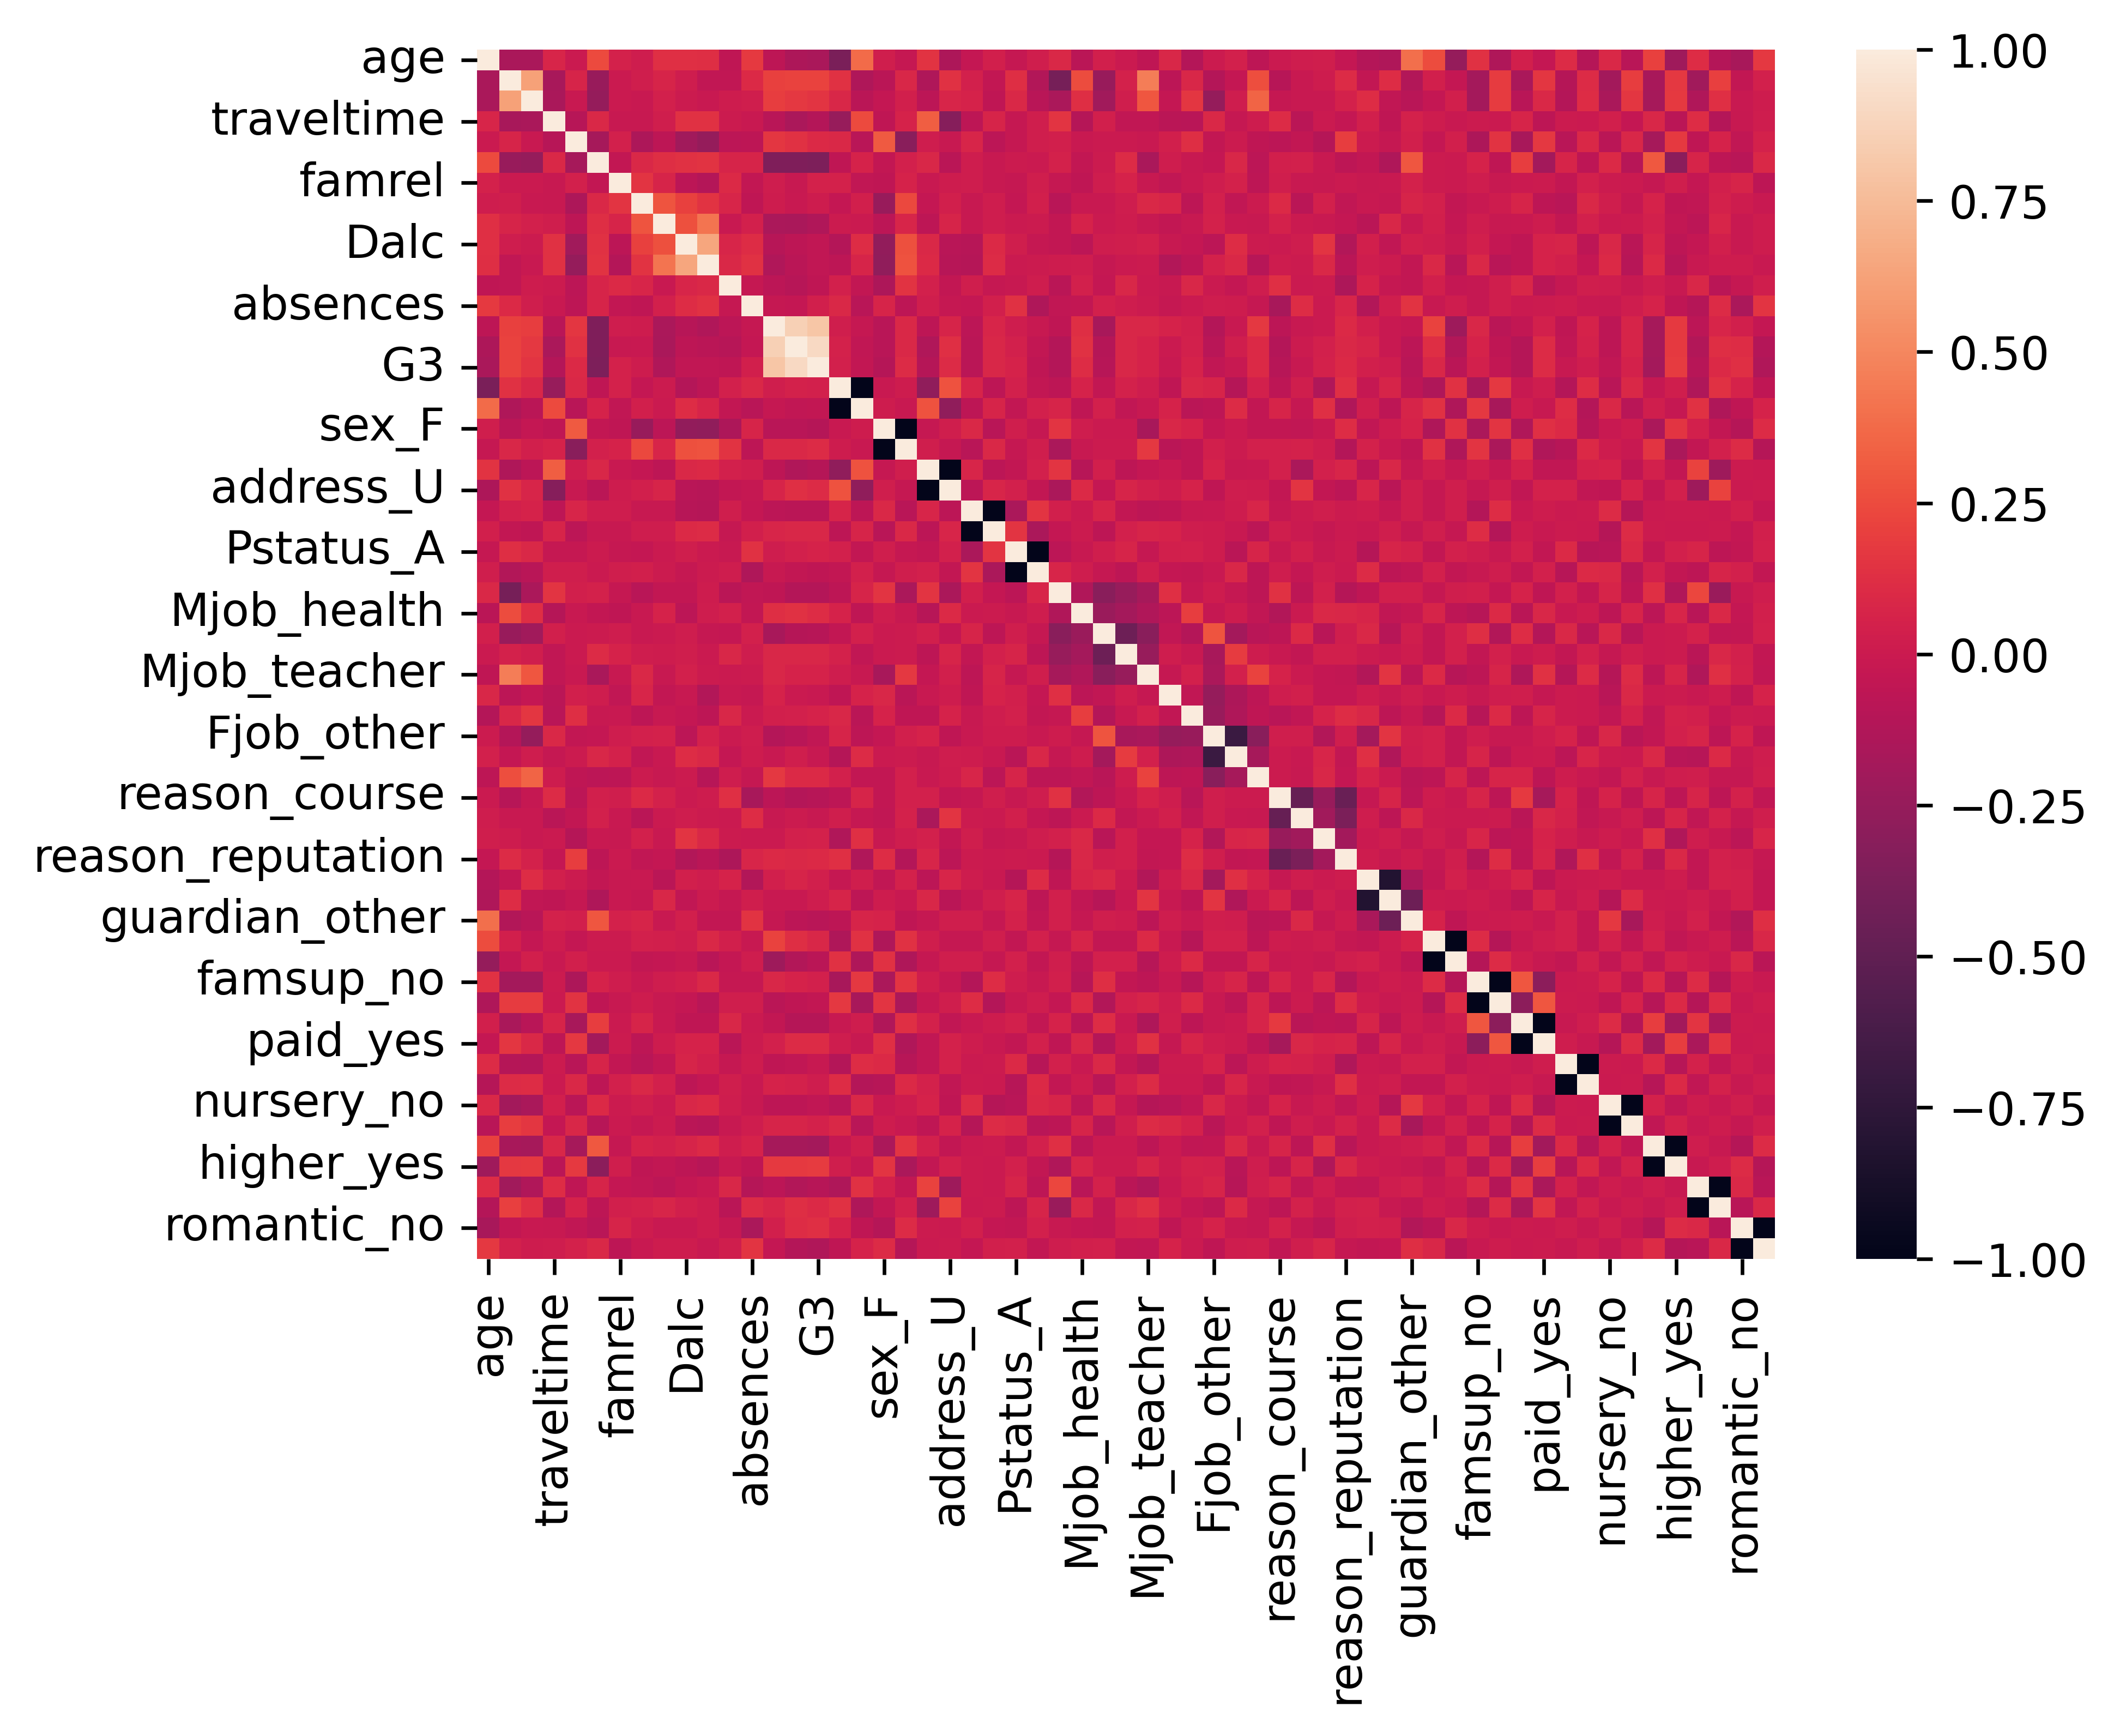

In [10]:
sns.heatmap(standardize(mat)[0].corr())

<Axes: >

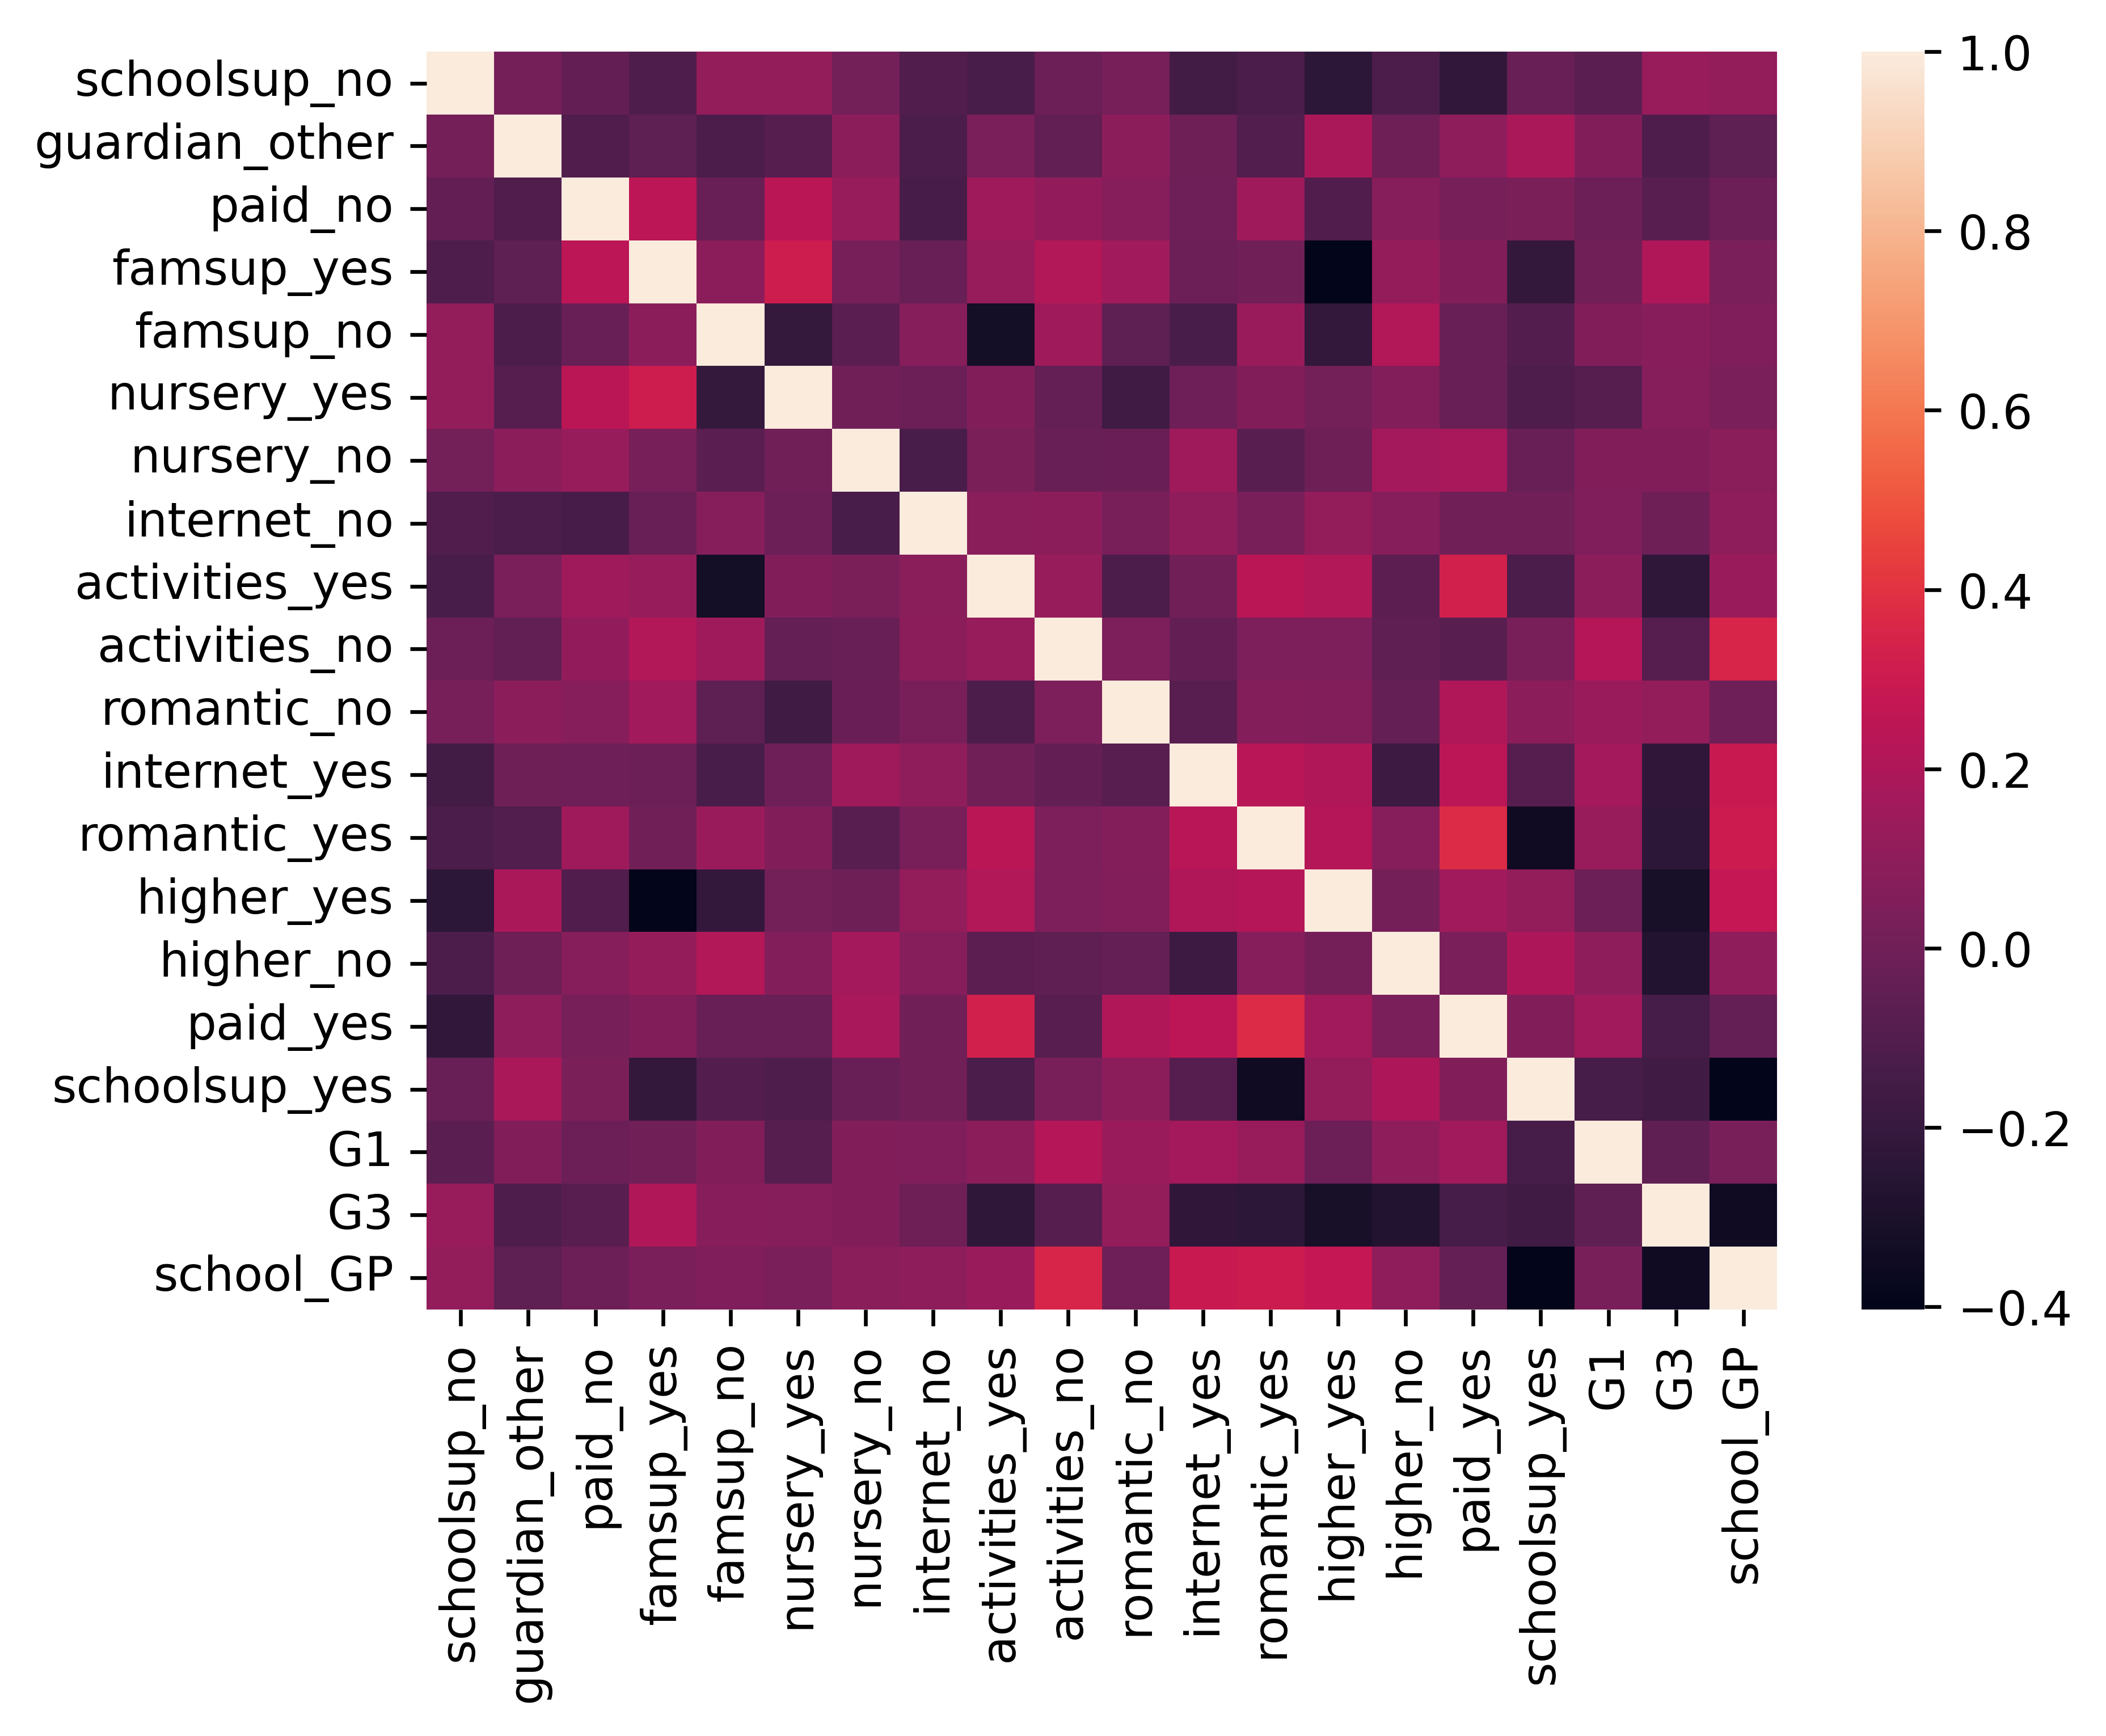

In [11]:
sns.heatmap(mat_PCA.corr())

In [12]:
por_PCA, por_loadings = PrincipalComponentAnalysis(por, 20)
por_loadings

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,-0.126028,-0.072300,0.152602,-0.034795,-0.150055,-0.145865,0.012918,0.017725,0.023494,0.024444,-0.085223,0.074340,-0.073587,-0.063774,-0.034291,-0.007841,-0.060880,-0.122488,0.088885,-0.146240,0.041761,0.076772,0.090671,-0.532392,-0.142622,-0.359675,0.113201,-0.181438,0.049165,-0.023074,-0.091600,0.305382,-0.096735,-0.144789,0.043906,0.109822,0.315983,0.148059,0.222035,-0.134198,-0.068782,-0.002460,-1.006878e-16,9.935227e-17,-7.377114e-17,-1.284539e-16,2.672642e-17,4.058693e-17,4.058693e-17,4.180535e-17,5.834042e-17,-3.981290e-17,3.735681e-17,3.735681e-17,-6.066322e-17,-1.866670e-17,1.376029e-16,8.047282e-33,7.158969e-32
1,0.247984,-0.151412,-0.043686,-0.013006,0.095990,-0.138434,0.045199,0.032264,0.005382,0.151944,0.055574,-0.105391,0.012650,0.114438,-0.196816,-0.678212,0.310021,-0.098818,-0.021638,0.039612,-0.023234,-0.046522,0.024504,0.001351,0.177135,-0.078869,0.113401,-0.053589,-0.112725,0.003817,0.200637,0.142474,0.246070,-0.037910,-0.049519,-0.036213,-0.022020,-0.020641,0.058493,-0.064539,-0.139147,-0.036417,2.909475e-16,4.393623e-16,4.475937e-17,-5.555968e-17,-3.874144e-16,-1.199160e-16,-1.199160e-16,-4.230850e-16,-4.231622e-17,2.156911e-17,1.192177e-17,1.192177e-17,-2.754353e-17,1.762797e-17,-2.265306e-17,9.017249e-17,-5.670264e-17
2,0.211537,-0.125056,-0.088106,-0.043082,0.098492,-0.086667,0.130758,-0.010386,0.017666,0.121409,-0.044921,-0.111306,0.080286,0.095850,-0.235927,0.484084,-0.175501,-0.086508,-0.002560,-0.021470,0.011649,0.015753,0.093966,0.041623,0.545234,-0.232183,0.080256,-0.002732,-0.135446,0.245532,-0.028434,0.050867,0.052409,-0.086601,-0.116929,0.034226,-0.042156,-0.124561,0.067852,-0.105174,-0.026320,-0.111275,-3.113561e-16,-4.755109e-16,2.871528e-16,7.792359e-16,3.013540e-16,-2.320037e-16,-2.320037e-16,4.617565e-16,-3.899429e-16,3.871305e-16,9.442983e-17,9.442983e-17,1.595797e-16,1.474431e-16,-1.480143e-17,2.686583e-19,-1.499787e-17
3,-0.163313,0.067217,-0.104201,0.105383,-0.010968,0.007957,-0.062902,-0.022658,0.130154,-0.090384,-0.021722,0.013621,0.028838,0.082158,-0.054893,-0.039889,-0.013370,-0.007974,0.025798,-0.140738,0.104565,0.130447,-0.048820,-0.120414,0.262002,-0.163356,0.024026,0.093182,0.006090,-0.404136,0.422684,-0.171731,-0.347411,0.113373,-0.412532,0.034726,-0.000588,0.024701,-0.009409,0.214876,-0.091852,0.048398,-2.250063e-17,-7.581881e-18,-3.743291e-17,1.265797e-16,1.958714e-16,-2.171507e-17,-2.171507e-17,-1.432851e-16,-6.863964e-17,3.819448e-17,-7.847089e-17,-7.847089e-17,-7.448582e-17,-8.456825e-17,-8.621928e-17,4.809331e-18,-9.181782e-18
4,0.132826,0.150729,0.002740,-0.068848,-0.031573,-0.095387,-0.002356,-0.011534,0.039129,-0.122057,0.023386,-0.026981,0.028431,-0.057605,0.070409,0.016892,-0.106128,-0.012735,0.062205,-0.016586,-0.016410,0.042712,-0.019211,0.106089,-0.020607,0.191884,0.032676,-0.194793,-0.485019,0.011812,0.001114,0.327057,-0.165339,0.288166,-0.129183,-0.517369,0.229261,0.029069,0.123561,0.057955,0.054040,0.000304,1.123897e-16,-3.281822e-16,-1.203471e-16,9.250012e-17,-2.984940e-17,-5.995794e-17,-5.995794e-17,7.523025e-17,-1.018925e-16,8.727589e-17,2.655421e-17,2.655421e-17,3.576900e-17,1.122117e-16,7.894519e-17,-5.629714e-18,-2.507072e-18
5,-0.194042,-0.114516,0.064485,-0.147382,0.018308,-0.045945,-0.010148,0.013087,-0.041725,-0.029724,0.047346,0.069584,0.053487,-0.065363,-0.066002,0.015512,0.051495,-0.074387,-0.029701,0.050960,-0.006732,0.108362,-0.048155,0.44

<Axes: >

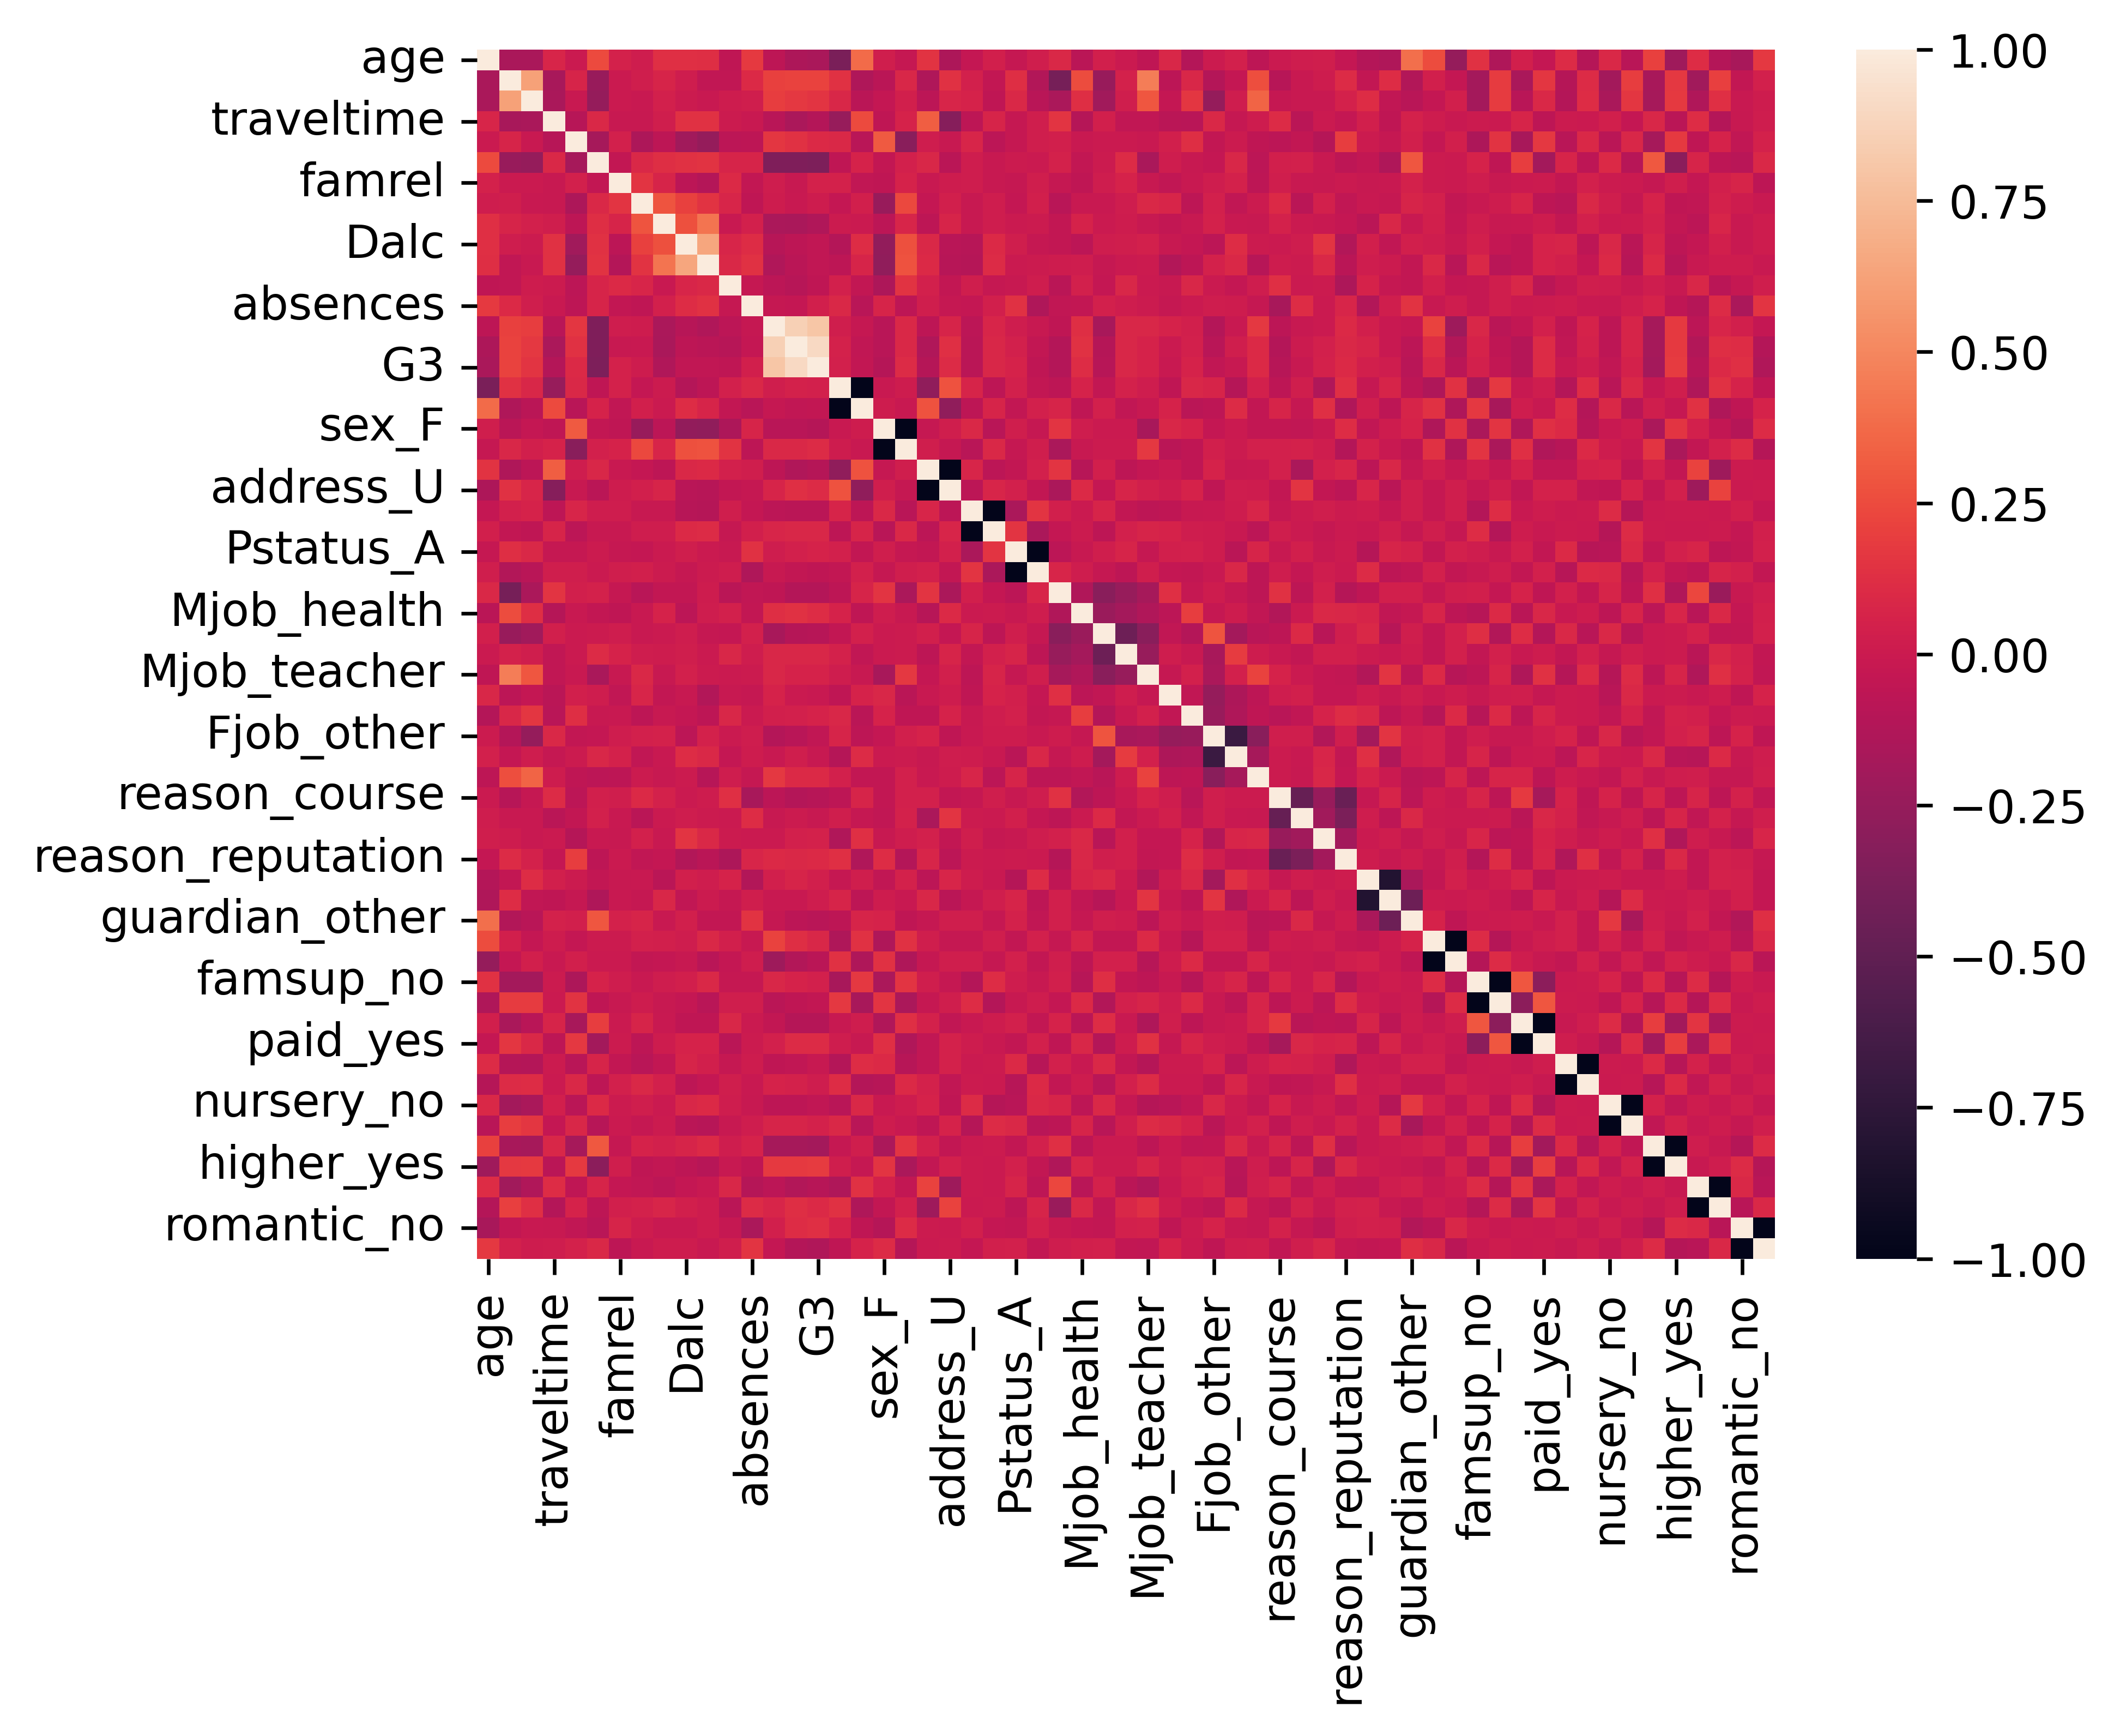

In [13]:
sns.heatmap(standardize(mat)[0].corr())

<Axes: >

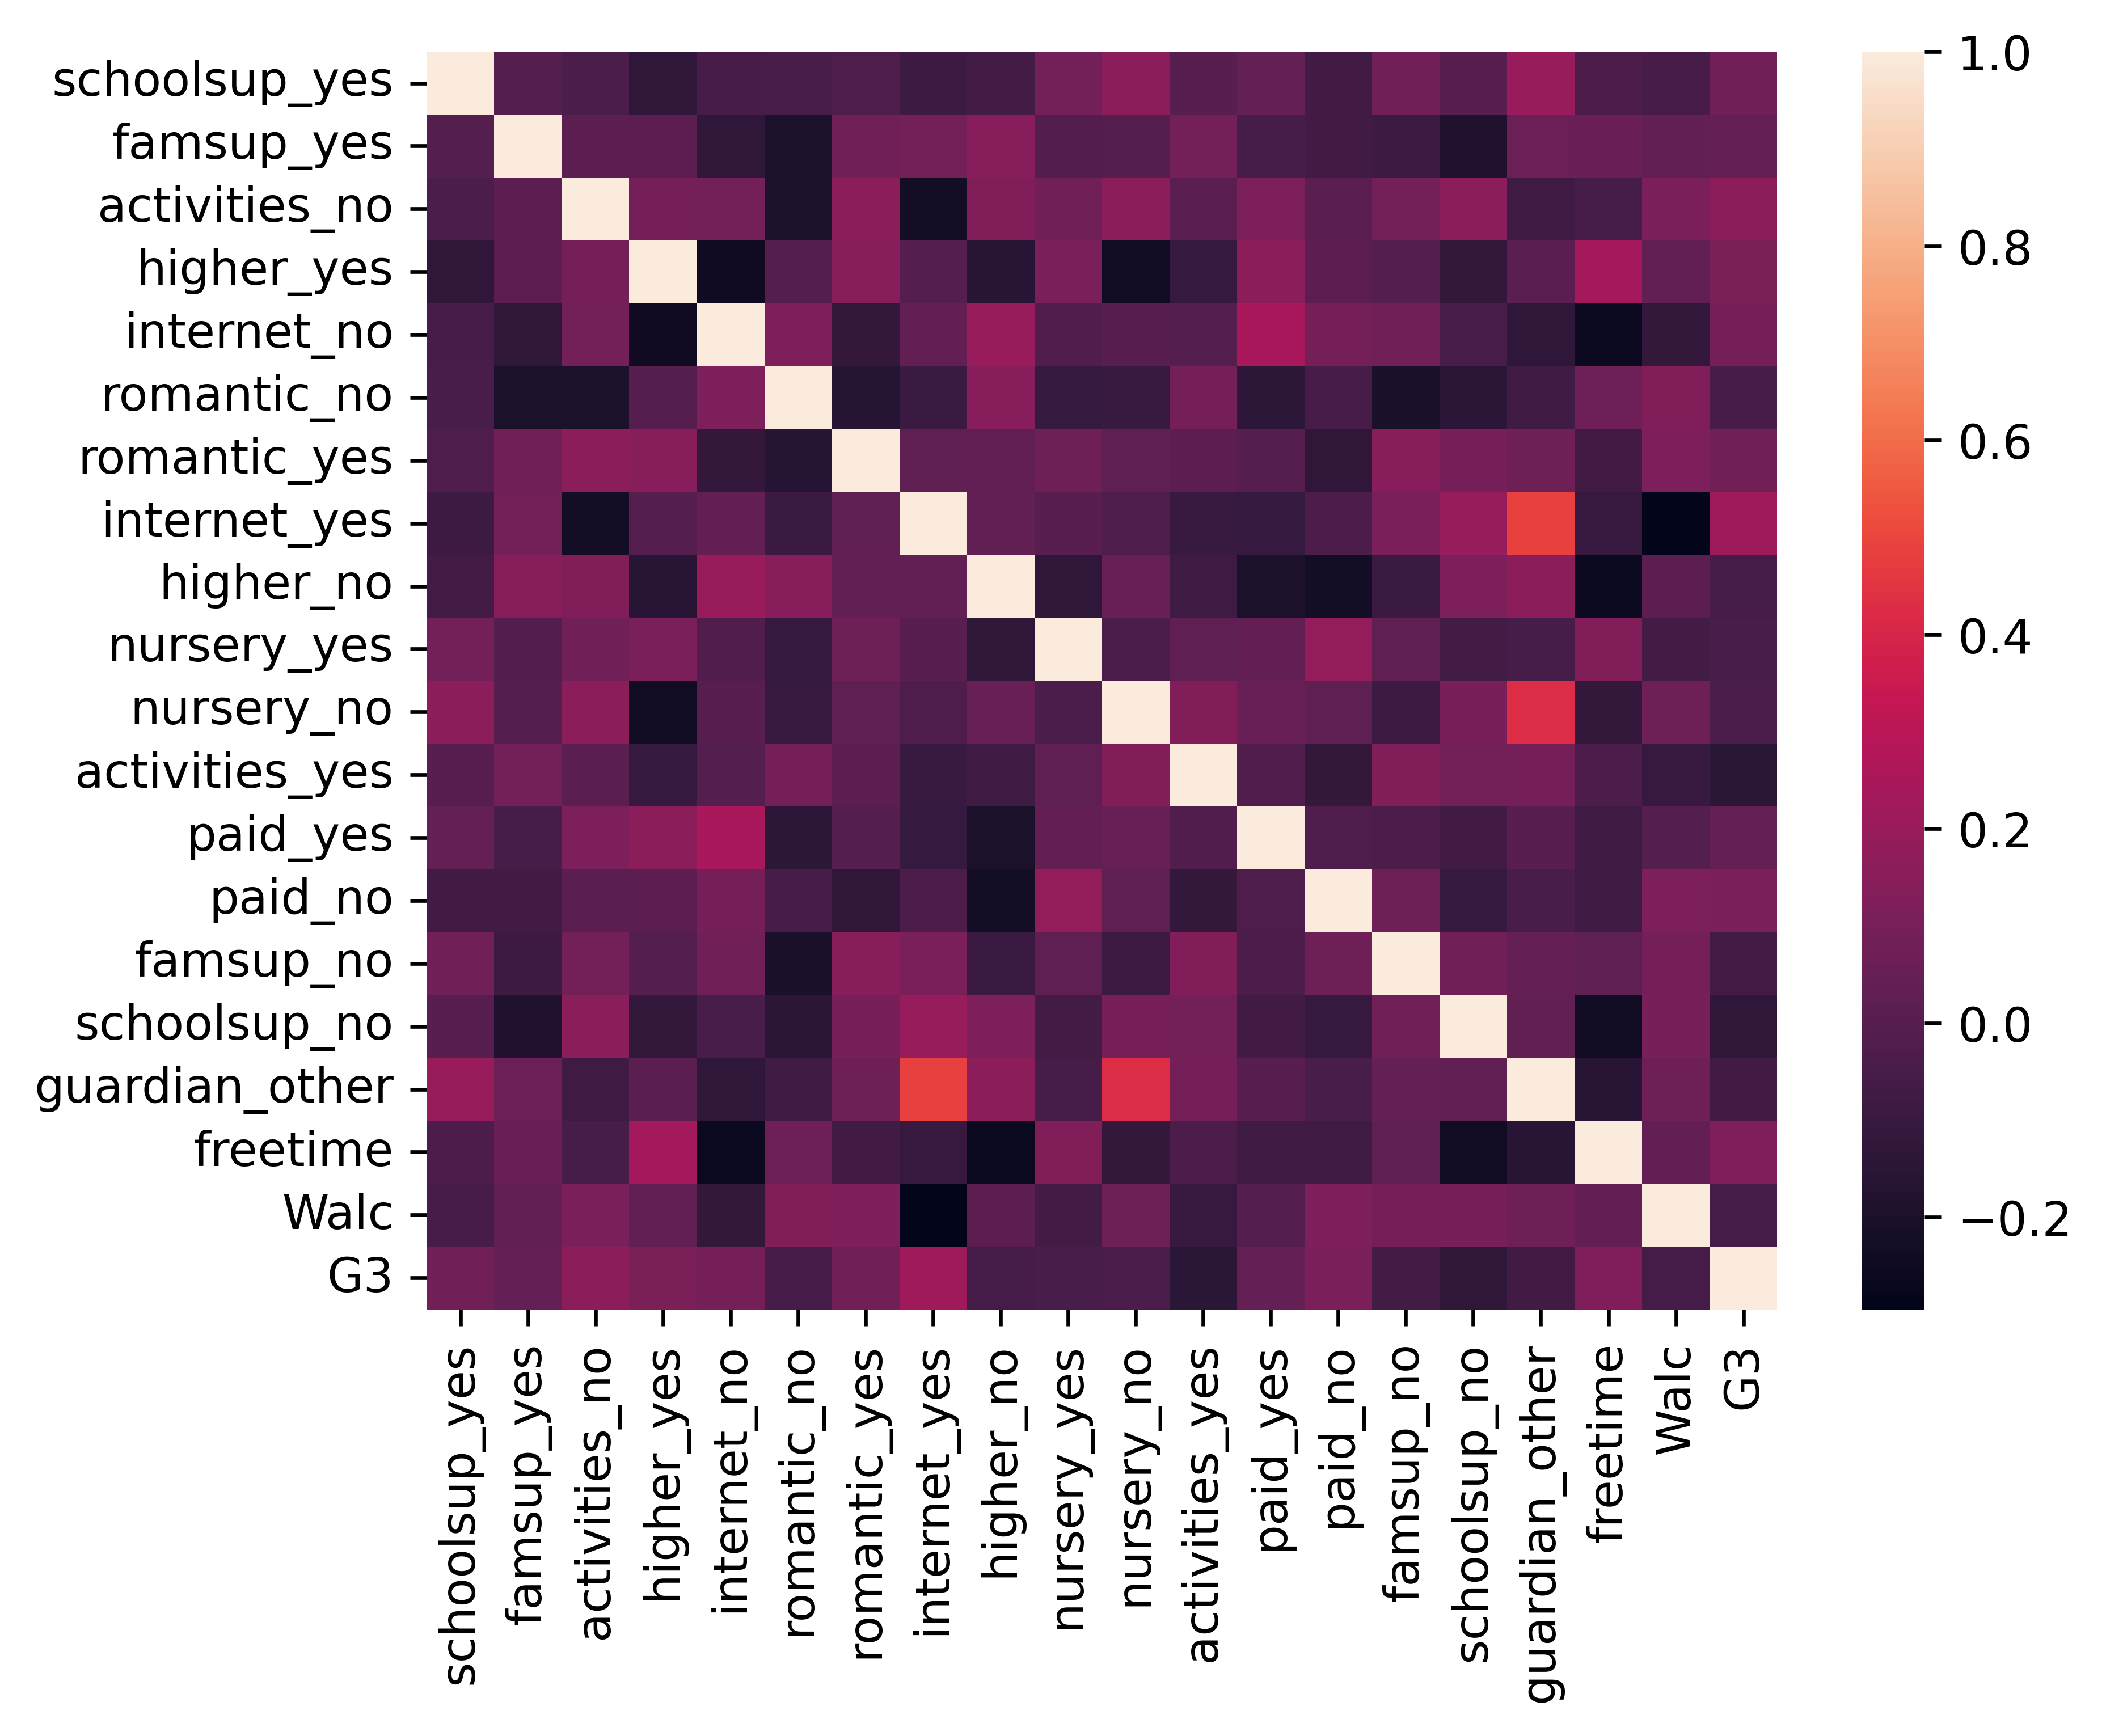

In [14]:
sns.heatmap(por_PCA.corr())

# Exports

In [15]:
mat_PCA.to_csv('student-mat-PCA.csv', index=False)
por_PCA.to_csv('student-por-PCA.csv', index=False)